## Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [41]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [42]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [43]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [44]:
df_fake["class"] = 0
df_true["class"] = 1

# This code adds a new column called "class" to two DataFrames:
# - In df_fake, every row is given the label 0 (indicating "fake")
# - In df_true, every row is given the label 1 (indicating "true")
#
# Purpose: To create target labels for supervised learning,
# so later the two datasets can be combined and used to train
# a classification model that distinguishes between fake and true data.

In [45]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging True and Fake Dataframes

In [46]:
df_merge = pd.concat([df_fake, df_true], axis =0 )  # combine the two DataFrames row-wise
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [47]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [48]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [49]:
df.isnull().sum()

,0
text,0
class,0


## Random Shuffling the dataframe

In [50]:
df = df.sample(frac=1).reset_index(drop=True)

# ------------------------------------------------------------
# This shuffles all the rows in the DataFrame randomly.
# frac=1 means "return 100% of the data, but in random order".
# Useful to remove the original ordering (fake first, then true)
# before splitting into training and test sets.

In [51]:
df.head()

,text,class
0,"ALTOONA, Iowa (Reuters) - Iowa’s governor said...",1
1,MEXICO CITY (Reuters) - Mexico’s government we...,1
2,DETROIT/WASHINGTON (Reuters) - Republican Dona...,1
3,21st Century Wire says The issue of honest pol...,0
4,"AUSTIN, Texas (Reuters) - U.S. President Barac...",1


In [52]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [53]:
df.columns

Index(['text', 'class'], dtype='object')

In [54]:
df.head()

,text,class
0,"ALTOONA, Iowa (Reuters) - Iowa’s governor said...",1
1,MEXICO CITY (Reuters) - Mexico’s government we...,1
2,DETROIT/WASHINGTON (Reuters) - Republican Dona...,1
3,21st Century Wire says The issue of honest pol...,0
4,"AUSTIN, Texas (Reuters) - U.S. President Barac...",1


## Creating a function to process the texts

In [55]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# This function takes a text string and cleans it for NLP tasks:
# - Converts all text to lowercase
# - Removes square-bracket content, HTML tags, and URLs
# - Removes punctuation, special characters, and newlines
# - Removes words containing digits
# Result: a simplified "clean" text string with only lowercase alphabetic words

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1778044250.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/tmp/ipython-input-1778044250.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/tmp/ipython-input-1778044250.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [56]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [57]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# - TF-IDF changes text into numeric values for machine learning.
# - fit_transform() = learn from training text + convert it.
# - transform() = convert test text (without learning again).

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [61]:
y_pred_train = LR.predict(xv_train)
print("Training Accuracy:", LR.score(xv_train, y_train))
print("\nClassification Report on Training Set:\n")
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.9910016927508687

Classification Report on Training Set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17607
           1       0.99      0.99      0.99     16066

    accuracy                           0.99     33673
   macro avg       0.99      0.99      0.99     33673
weighted avg       0.99      0.99      0.99     33673



In [62]:
y_pred_test = LR.predict(xv_test)
print("Test Accuracy:", LR.score(xv_test, y_test))
print("\nClassification Report on Test Set:\n")
print(classification_report(y_test, y_pred_test))

Test Accuracy: 0.9862806236080178

Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5874
           1       0.98      0.99      0.99      5351

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



## Main Regression Metrics Example

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print results
print("MAE:", mae)   # MAE = 0.5 → on average, predictions are 0.5 units off
print("MSE:", mse)   # MSE = 0.375 → squared error average (penalizes large errors more)
print("RMSE:", rmse) # RMSE ≈ 0.61 → typical prediction error is ~0.6 units
print("R²:", r2)     # R² ≈ 0.95 → the model explains 95% of the variance in y_true

# ------------------------------------------------------------
# Summary:
# - MAE tells us predictions are off by about 0.5 units on average.
# - MSE emphasizes bigger errors but is less intuitive (squared units).
# - RMSE is ~0.61, meaning typical error size is ~0.6 in the same units as the target.
# - R² = 0.95 shows the model is performing very well, explaining 95% of the variation.

MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
R²: 0.9486081370449679


## Classification Metrics

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8


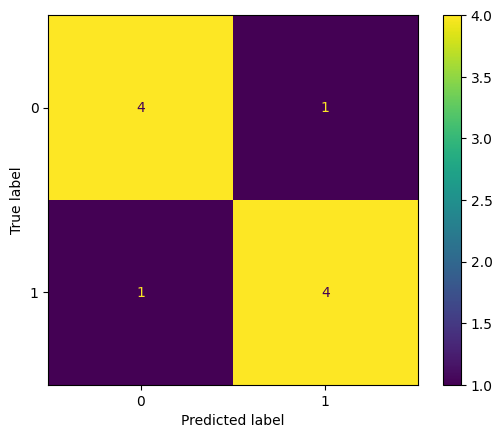

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()